## Lead Scoring
**Authors**: Emily Webber & Thodoris Petropoulus

In this exercise we are going to use a strategy called “lead scoring” to predict the probability that a prospect will become a customer. To achieve this, we are going to use binary classification.

**There are a few things that you need for this exercise:** 

1. Your DataRobot login 
2. Your DataRobot API key
3. The exercise dataset:  bank-full.csv

## Credentials
To access the DataRobot API, you need to connect to it. To make sure only authorized users are accessing the DataRobot API, you need to provide your username, password or API token. You also need to ensure your "API Access" configuration is ON (please ask your administrator if not).

To find your API Token, visit YOUR_API_HOST, log in, and look under **Developer Tools** (under the person icon).


## Import Library and Enter Credentials

You must import the appropriate libaries and enter your credentials to connect with DataRobot.

In [41]:
import datarobot as dr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
token = 'YOUR_TOKEN'
endpoint = 'YOUR_DR_URL/api/v2'

dr.Client(token=token, 
          endpoint= endpoint)

## Dataset

The dataset was taken from the UCI Machine Learning Repository. It was published in a paper by Sérgio Moro and colleagues in 2014.

*[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014*

This dataset includes information from a direct telemarketing campaign of a Portuguese bank. The target is indicated by the feature “**y**” and a “yes” means that the prospect purchased the product being offered and “no” means that they did not.



In [10]:
df = pd.read_csv('bank-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Start Project

For the setup, start the project with the dataset (**bank-full.csv**) and indicate the target as “**y**”.  Set the mode to "**Quick**".


In [17]:
project = dr.Project.create(project_name='bank-full.csv',
                        sourcedata= df)


In [ ]:
project.set_target(
    target='y',
    worker_count = '-1',
     mode=dr.AUTOPILOT_MODE.QUICK
)

project.wait_for_autopilot() #Wait for autopilot to complete

It can be onerous to rerun Autopilot every time you want to run the script.  If your project is already created, then you can comment out the previous chunk of code.  This will make sure you do not rerun Autopilot.  You can then simply refer to the project using the GetProject function (see code below).  The project id refers to the first number in the URL for the project. 


In [19]:
#project = dr.Project.get(project_id='YOUR_PROJECT_ID')

## Select Model to Evaluate

You want to select the 80% version of the top model to evaluate. You can use the code below to select this model. 

In [32]:
models =project.get_models(
    search_params={
        'sample_pct__gt': 80,
    })

In [33]:
model = models[1]
model.id


'5f371ee53b6e1a33dcb6b4b7'

## Get Validation Scores

You can get the validation and cross-validation scores for every possible metric of the model using the code below.  This can be pulled for multiple models if you want to compare them programmatically.  


In [38]:
model.metrics

{'AUC': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.9355399999999999,
  'validation': 0.94041},
 'Rate@Top5%': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.7027620000000001,
  'validation': 0.74309},
 'Max MCC': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.591086,
  'validation': 0.60979},
 'RMSE': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.24907200000000002,
  'validation': 0.24416},
 'Kolmogorov-Smirnov': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.748954,
  'validation': 0.75366},
 'Rate@TopTenth%': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.875,
  'validation': 0.875},
 'LogLoss': {'backtesting': None,
  'holdout': None,
  'backtestingScores': None,
  'crossValidation': 0.19676200000000002,
  

## Get ROC Curve

Now that we know the overall performance of the model, let's take a deeper look at the ROC Curve.  You can use the code below to pull the ROC chart from DataRobot and plot it.

In [39]:
roc = model.get_roc_curve('crossValidation')

#Save the result into a pandas dataframe
df = pd.DataFrame(roc.roc_points)
df.head()

,accuracy,f1_score,false_negative_score,true_negative_score,true_positive_score,false_positive_score,true_negative_rate,false_positive_rate,true_positive_rate,matthews_correlation_coefficient,positive_predictive_value,negative_predictive_value,threshold,fraction_predicted_as_positive,fraction_predicted_as_negative,lift_positive,lift_negative
0,0.883021,0.000000,4231,31938,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.883021,1.000000,0.000000,1.000000,0.000000,1.000000
1,0.883049,0.000473,4230,31938,1,0,1.000000,0.000000,0.000236,0.014447,1.000000,0.883046,0.980059,0.000028,0.999972,8.548570,1.000028
2,0.884542,0.029289,4168,31930,63,8,0.999750,0.000250,0.014890,0.106300,0.887324,0.884537,0.930287,0.001963,0.998037,7.585351,1.001716
3,0.888772,0.110939,3980,31895,251,43,0.998654,0.001346,0.059324,0.207523,0.853741,0.889059,0.875943,0.008129,0.991871,7.298269,1.006838
4,0.889657,0.131069,3930,31877,301,61,0.998090,0.001910,0.071142,0.223533,0.831492,0.890245,0.862702,0.010009,0.989991,7.108065,1.008180


## Plot the ROC Curve

(0, 1)

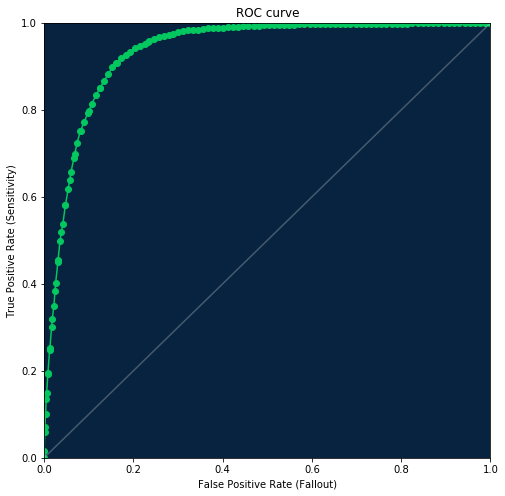

In [42]:
dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'
dr_dark_blue = '#08233F'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylim([0, 1])

## Get the Feature Impact

Now that we have evaluated our model, let's take a look at which features have the highest impact.

In [46]:
#Get Feature Impact
feature_impact = model.get_or_request_feature_impact()

#Save feature impact in pandas dataframe
fi_df = pd.DataFrame(feature_impact)
fi_df

,redundantWith,featureName,impactNormalized,impactUnnormalized
0,None,duration,1.000000,0.256413
1,None,month,0.370865,0.095095
2,None,day,0.186467,0.047813
3,None,contact,0.116615,0.029902
4,None,poutcome,0.086397,0.022153
5,None,balance,0.080238,0.020574
6,None,age,0.070169,0.017992
7,None,housing,0.065196,0.016717
8,None,pdays,0.055162,0.014144
9,None,campaign,0.053662,0.013760


## Plot Feature Impact


Feature impact is calculated using Permutation Importance. We can see that the most impactful feature is **duration**, followed by **month** and **day**. 



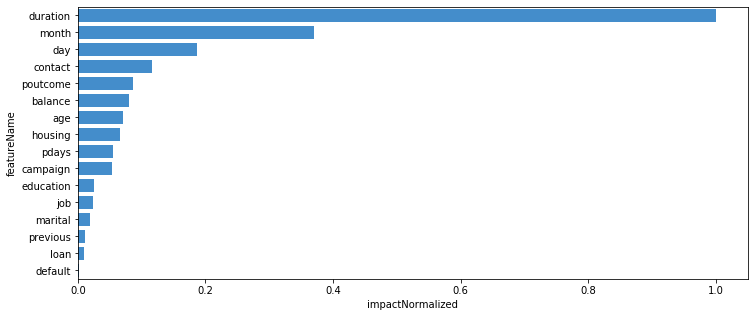

In [55]:
fig, ax = plt.subplots(figsize = (12,5))

#Plot feature impact
sns.barplot(x='impactNormalized', y='featureName', data=fi_df, color='#2D8FE2')

## Get Holdout Predictions

By default DataRobot does a five-fold cross-validation and 20% holdout.  The holdout data was not used during the training and we can pull these scores to see how our model predicted on new data. 

In [56]:
training_predictions_job = model.request_training_predictions(dr.enums.DATA_SUBSET.HOLDOUT)
training_predictions = training_predictions_job.get_result_when_complete()


Downlaod to a CSV file.

In [62]:
training_predictions.download_to_csv('predictions.csv')

### Other Analyses to Try

You can do a lot programmatically with the API.  You can get confusion matrices, lift charts, word clouds, and even create model factories.  Check out the [tutorials on our GitHub](https://github.com/datarobot-community/tutorials-for-data-scientists) page! 
